# Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc, roc_curve, RocCurveDisplay, r2_score,\
    mean_absolute_error, mean_squared_error, recall_score, accuracy_score, f1_score, \
    precision_score, balanced_accuracy_score, roc_auc_score

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.svm import SVR, SVC

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Custom functions

In [2]:
from pickle_managment import load_pickle
from model_evaluation import delongs_test

# Regression

## Residuals

In [3]:
svm_model = load_pickle(r'model_pickles\best_svm_regressor.pkl')

regression_X_test = load_pickle(r'model_outputs\svr_regressor\regression_x_test.pkl')
regression_y_test = load_pickle(r'model_outputs\svr_regressor\regression_y_test.pkl')
regression_X_train = load_pickle(r'model_outputs\svr_regressor\regression_x_train.pkl')
regression_y_train = load_pickle(r'model_outputs\svr_regressor\regression_y_train.pkl')


In [4]:
mae_list = []
mse_list = []
r2_list = []
for data_X, data_y in [[regression_X_train, regression_y_train],
                       [regression_X_test, regression_y_test]]:
    y_predict = svm_model.predict(data_X)

    mae = mean_absolute_error(np.copy(data_y), y_predict)
    mse = mean_squared_error(np.copy(data_y), y_predict)
    r2 = r2_score(np.copy(data_y), y_predict)

    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

performance_df = pd.DataFrame(
    {
        'Dataset': ['Train', 'Test'],
        'MAE': mae_list,
        'MSE': mse_list,
        'R2': r2_list
    }
)

performance_df_melted = performance_df.melt(id_vars='Dataset',
                                            var_name='Metric',
                                            value_name='Value')
performance_df_melted

,Dataset,Metric,Value
0,Train,MAE,0.097907
1,Test,MAE,0.373825
2,Train,MSE,0.014446
3,Test,MSE,0.265574
4,Train,R2,0.974893
5,Test,R2,0.509841


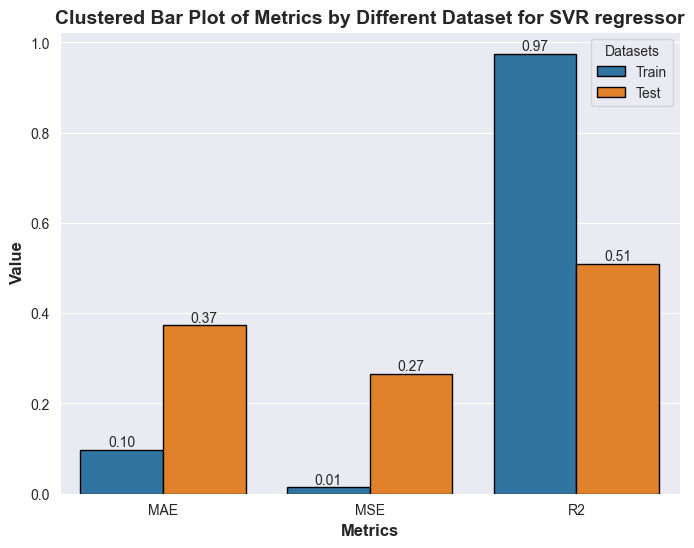

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(data=performance_df_melted, x='Metric', y='Value',
                 hue='Dataset',
                 edgecolor='black')

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.2f'  #Round the data label to the 2 decimal places
    )

plt.xlabel('Metrics', weight='bold', fontsize=12)
plt.ylabel('Value', weight='bold', fontsize=12)
plt.title('Clustered Bar Plot of Metrics by Different Dataset for SVR '
          'regressor',
          weight='bold', fontsize=14)
plt.legend(title='Datasets')

plt.savefig(
    r'model_outputs\svr_regressor\metrics.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()

In [6]:
svm_predicted_y_train = svm_model.predict(regression_X_train)
svm_residual_train = regression_y_train - svm_predicted_y_train

svm_predicted_y_test = svm_model.predict(regression_X_test)
svm_residual_test = regression_y_test - svm_predicted_y_test


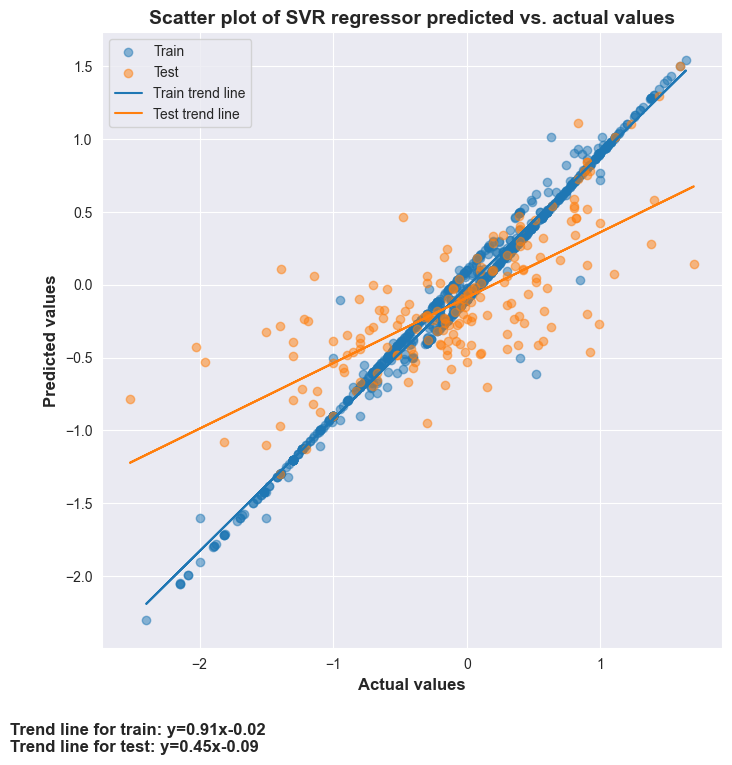

In [7]:
# Calculate coefficients for trend lines
coefficients_train = np.polyfit(regression_y_train, svm_predicted_y_train, 1)
poly_train = np.poly1d(coefficients_train)
coefficients_test = np.polyfit(regression_y_test, svm_predicted_y_test, 1)
poly_test = np.poly1d(coefficients_test)

fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(regression_y_train, svm_predicted_y_train, alpha=0.5,
            label='Train')
plt.scatter(regression_y_test, svm_predicted_y_test, alpha=0.5, label='Test')

plt.plot(regression_y_train, poly_train(regression_y_train),
         linestyle='-', label='Train trend line')
plt.plot(regression_y_test, poly_test(regression_y_test),
         linestyle='-', label='Test trend line')

plt.xlabel('Actual values', weight='bold', fontsize=12)
plt.ylabel('Predicted values', weight='bold', fontsize=12)
plt.title('Scatter plot of SVR regressor predicted vs. actual values',
          weight='bold', fontsize=14)
plt.legend()
plt.grid(True)

plt.figtext(
    0.01,
    -0.02,
    'Trend line for train: y={:.2f}x{:.2f}\nTrend line for test: y={:.2f}x{:.2f}'.format(
        coefficients_train[0],
        coefficients_train[1],
        coefficients_test[0],
        coefficients_test[1]
    ),
    horizontalalignment='left',
    weight='bold',
    fontsize=12
)

plt.savefig(
    r'model_outputs\svr_regressor\pred_vs_actual.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()

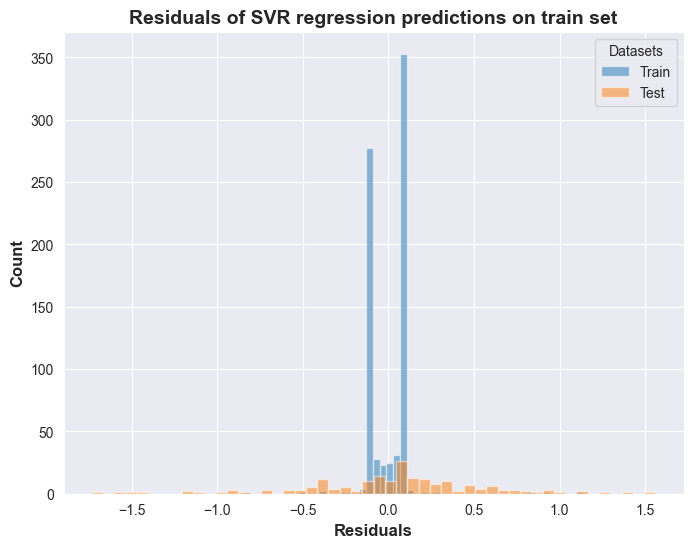

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.hist(svm_residual_train, bins=50, alpha=0.5, label='Train')
plt.hist(svm_residual_test, bins=50, alpha=0.5, label='Test')

plt.xlabel('Residuals', weight='bold', fontsize=12)
plt.ylabel('Count', weight='bold', fontsize=12)
plt.title('Residuals of SVR regression predictions on train set', weight='bold',
          fontsize=14)
plt.legend(title='Datasets')

plt.savefig(
    r'model_outputs\svr_regressor\residuals.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()

#Categorical

## Load Pickles

In [9]:
centroid_svm = load_pickle(r'model_pickles\best_svm_classifier_centroid.pkl')
smoteenn_svm = load_pickle(r'model_pickles\best_svm_classifier_smoteenn.pkl')

centroid_X_test = load_pickle(r'model_outputs\svm_classifier\centroid_x_test.pkl')
centroid_y_test = load_pickle(r'model_outputs\svm_classifier\centroid_y_test.pkl')
centroid_X_train = load_pickle(r'model_outputs\svm_classifier\centroid_x_train.pkl')
centroid_y_train = load_pickle(r'model_outputs\svm_classifier\centroid_y_train.pkl')

smoteenn_X_test = load_pickle(r'model_outputs\svm_classifier\smoteenn_x_test.pkl')
smoteenn_y_test = load_pickle(r'model_outputs\svm_classifier\smoteenn_y_test.pkl')
smoteenn_X_train = load_pickle(r'model_outputs\svm_classifier\smoteenn_x_train.pkl')
smoteenn_y_train = load_pickle(r'model_outputs\svm_classifier\smoteenn_y_train.pkl')

## Centroid
### Performance on train vs. test sets

In [10]:
recall_list = []
precision_list = []
f1_list = []
accuracy_list = []
balanced_accuracy_list = []
auroc_list = []

for data_X, data_y in [[centroid_X_train, centroid_y_train],
                       [centroid_X_test, centroid_y_test]]:
    y_predict = centroid_svm.predict(data_X)

    data_y_numeric = np.where(data_y == 'BBB+', 1, 0)
    y_predict_numeric = np.where(y_predict == 'BBB+', 1, 0)

    recall = recall_score(np.copy(data_y_numeric), y_predict_numeric)
    precision = precision_score(np.copy(data_y_numeric), y_predict_numeric)
    f1 = f1_score(np.copy(data_y_numeric), y_predict_numeric)
    accuracy = accuracy_score(np.copy(data_y_numeric), y_predict_numeric)
    balanced_accuracy = balanced_accuracy_score(np.copy(data_y_numeric), y_predict_numeric)
    auroc = roc_auc_score(np.copy(data_y_numeric), y_predict_numeric) #!!!!Need to figure
    # out how to do this

    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    accuracy_list.append(accuracy)
    balanced_accuracy_list.append(balanced_accuracy)
    auroc_list.append(auroc)

performance_df = pd.DataFrame(
    {
        'Dataset': ['Train', 'Test'],
        'Recall': mae_list,
        'Precision': mse_list,
        'F1': f1_list,
        'Accuracy': accuracy_list,
        'Balanced accuracy': balanced_accuracy_list,
        'AUROC': auroc_list
    }
)

performance_df_melted = performance_df.melt(id_vars='Dataset',
                                            var_name='Metric',
                                            value_name='Value')
performance_df_melted

,Dataset,Metric,Value
0,Train,Recall,0.097907
1,Test,Recall,0.373825
2,Train,Precision,0.014446
3,Test,Precision,0.265574
4,Train,F1,0.982413
5,Test,F1,0.857434
6,Train,Accuracy,0.982460
7,Test,Accuracy,0.863681
8,Train,Balanced accuracy,0.982461
9,Test,Balanced accuracy,0.863639


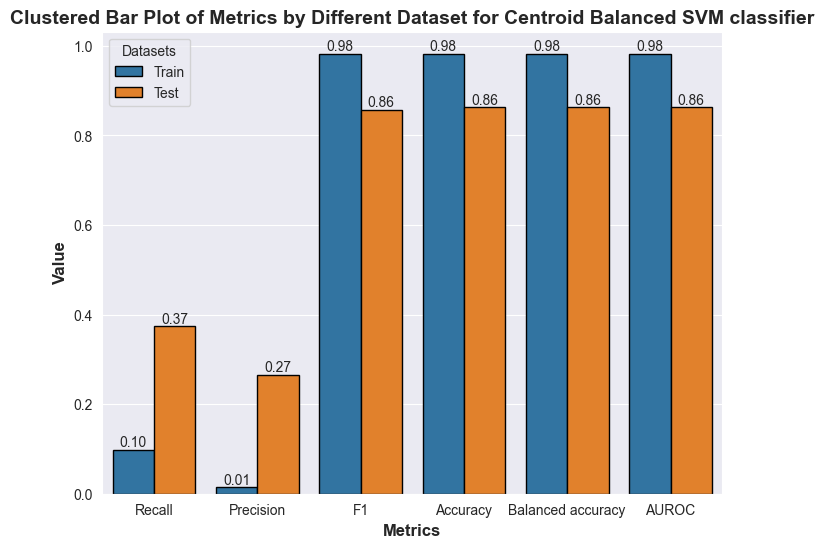

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(data=performance_df_melted, x='Metric', y='Value',
                 hue='Dataset',
                 edgecolor='black')

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.2f'  #Round the data label to the 2 decimal places
    )

plt.xlabel('Metrics', weight='bold', fontsize=12)
plt.ylabel('Value', weight='bold', fontsize=12)
plt.title('Clustered Bar Plot of Metrics by Different Dataset for Centroid Balanced SVM '
          'classifier',
          weight='bold', fontsize=14)
plt.legend(title='Datasets')

plt.savefig(
    r'model_outputs\svm_classifier\centroid_metrics.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()

### ROC Curve

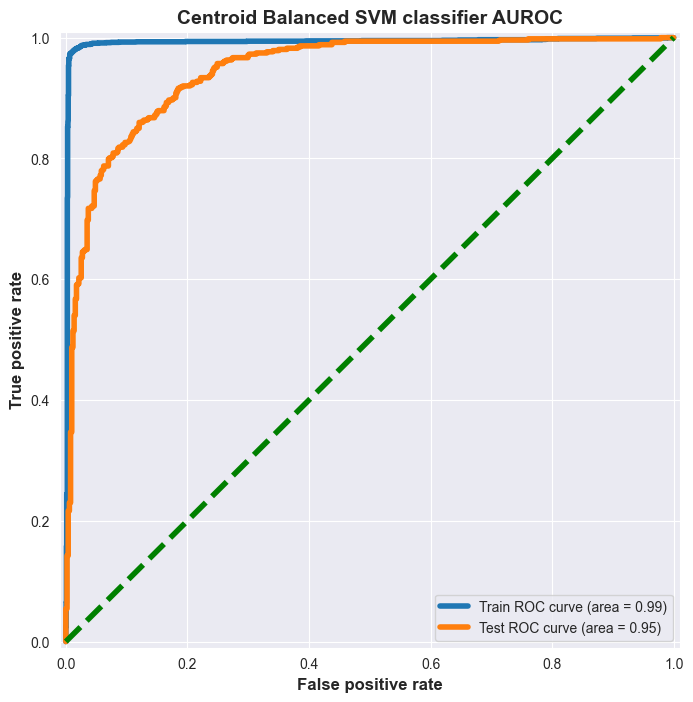

In [12]:
positive_label_index = np.where(centroid_svm.classes_ == 'BBB+')[0][0]
y_train_probabilities=centroid_svm.predict_proba(centroid_X_train)[:, positive_label_index]
y_test_probabilities=centroid_svm.predict_proba(centroid_X_test)[:, positive_label_index]

# Compute ROC curve and ROC area for each class
fpr_train, tpr_train, _ = roc_curve(centroid_y_train, y_train_probabilities,
                        pos_label='BBB+')
fpr_test, tpr_test, _ = roc_curve(centroid_y_test, y_test_probabilities,
                        pos_label='BBB+')
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

fig, ax = plt.subplots(figsize=(8, 8))

plt.plot(
    fpr_train,
    tpr_train,
    lw=4,
    label='Train ROC curve (area = %0.2f)' % roc_auc_train
)
plt.plot(
    fpr_test,
    tpr_test,
    lw=4,
    label='Test ROC curve (area = %0.2f)' % roc_auc_test
)
plt.plot(
    [0, 1],
    [0, 1],
    color='green',
    lw=4,
    linestyle='--'
)

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False positive rate',weight='bold', fontsize=12)
plt.ylabel('True positive rate',weight='bold', fontsize=12)
plt.title('Centroid Balanced SVM classifier AUROC',weight='bold', fontsize=14)
plt.legend(loc='lower right')

plt.savefig(
    r'model_outputs\svm_classifier\centroid_auroc.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()

## SMOTEENN
### Performance on train vs. test sets

In [13]:
recall_list = []
precision_list = []
f1_list = []
accuracy_list = []
balanced_accuracy_list = []
auroc_list = []

for data_X, data_y in [[smoteenn_X_train, smoteenn_y_train],
                       [smoteenn_X_test, smoteenn_y_test]]:
    y_predict = smoteenn_svm.predict(data_X)

    data_y_numeric = np.where(data_y == 'BBB+', 1, 0)
    y_predict_numeric = np.where(y_predict == 'BBB+', 1, 0)

    recall = recall_score(np.copy(data_y_numeric), y_predict_numeric)
    precision = precision_score(np.copy(data_y_numeric), y_predict_numeric)
    f1 = f1_score(np.copy(data_y_numeric), y_predict_numeric)
    accuracy = accuracy_score(np.copy(data_y_numeric), y_predict_numeric)
    balanced_accuracy = balanced_accuracy_score(np.copy(data_y_numeric), y_predict_numeric)
    auroc = roc_auc_score(np.copy(data_y_numeric), y_predict_numeric) #!!!!Need to figure
    # out how to do this

    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    accuracy_list.append(accuracy)
    balanced_accuracy_list.append(balanced_accuracy)
    auroc_list.append(auroc)

performance_df = pd.DataFrame(
    {
        'Dataset': ['Train', 'Test'],
        'Recall': mae_list,
        'Precision': mse_list,
        'F1': f1_list,
        'Accuracy': accuracy_list,
        'Balanced accuracy': balanced_accuracy_list,
        'AUROC': auroc_list
    }
)

performance_df_melted = performance_df.melt(id_vars='Dataset',
                                            var_name='Metric',
                                            value_name='Value')
performance_df_melted

,Dataset,Metric,Value
0,Train,Recall,0.097907
1,Test,Recall,0.373825
2,Train,Precision,0.014446
3,Test,Precision,0.265574
4,Train,F1,1.000000
5,Test,F1,0.963137
6,Train,Accuracy,1.000000
7,Test,Accuracy,0.961726
8,Train,Balanced accuracy,1.000000
9,Test,Balanced accuracy,0.961478


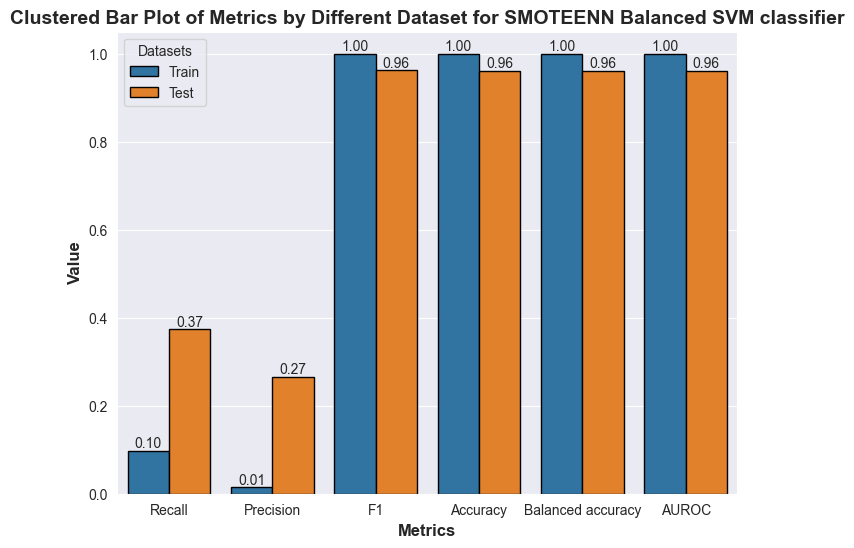

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(data=performance_df_melted, x='Metric', y='Value',
                 hue='Dataset',
                 edgecolor='black')

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.2f'  #Round the data label to the 2 decimal places
    )

plt.xlabel('Metrics', weight='bold', fontsize=12)
plt.ylabel('Value', weight='bold', fontsize=12)
plt.title('Clustered Bar Plot of Metrics by Different Dataset for SMOTEENN Balanced SVM '
          'classifier',
          weight='bold', fontsize=14)
plt.legend(title='Datasets')

plt.savefig(
    r'model_outputs\svm_classifier\SMOTEENN_metrics.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()

### ROC Curve

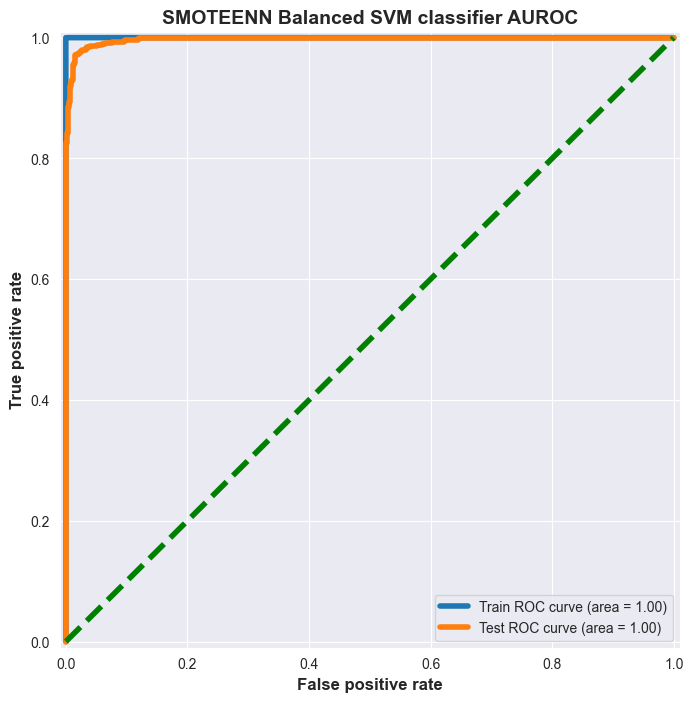

In [15]:
positive_label_index = np.where(smoteenn_svm.classes_ == 'BBB+')[0][0]
y_train_probabilities=smoteenn_svm.predict_proba(smoteenn_X_train)[:, positive_label_index]
y_test_probabilities=smoteenn_svm.predict_proba(smoteenn_X_test)[:, positive_label_index]

# Compute ROC curve and ROC area for each class
fpr_train, tpr_train, _ = roc_curve(smoteenn_y_train, y_train_probabilities,
                        pos_label='BBB+')
fpr_test, tpr_test, _ = roc_curve(smoteenn_y_test, y_test_probabilities,
                        pos_label='BBB+')
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

fig, ax = plt.subplots(figsize=(8, 8))

plt.plot(
    fpr_train,
    tpr_train,
    lw=4,
    label='Train ROC curve (area = %0.2f)' % roc_auc_train
)
plt.plot(
    fpr_test,
    tpr_test,
    lw=4,
    label='Test ROC curve (area = %0.2f)' % roc_auc_test
)
plt.plot(
    [0, 1],
    [0, 1],
    color='green',
    lw=4,
    linestyle='--'
)

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False positive rate',weight='bold', fontsize=12)
plt.ylabel('True positive rate',weight='bold', fontsize=12)
plt.title('SMOTEENN Balanced SVM classifier AUROC',weight='bold', fontsize=14)
plt.legend(loc='lower right')

plt.savefig(
    r'model_outputs\svm_classifier\smoteenn_auroc.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()

##Holdout Validation

In [16]:
classification_holdout_df = pd.read_csv(
    r'datasets\holdout_datasets\classification_df_expanded_cleaned_holdout.csv.zip'
)
classification_holdout_df

,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,158_y,159_y,160_y,161_y,162_y,163_y,164_y,165_y,166_y,BBB+/BBB-
0,c1ccc2c(c1)CCc1ccccc1N2C1CN2CCC1CC2,2.702037,2.702037,0.636944,0.636944,0.785000,28.869565,304.437,280.245,304.193949,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,BBB+
1,CN(C)CCN1C(=O)CC(c2ccccc2)Sc2ccccc21,12.867357,12.867357,0.175191,0.175191,0.853240,17.956522,326.465,304.289,326.145284,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB+
2,COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1C[C@...,12.770676,12.770676,0.058604,-0.957338,0.410670,36.750000,334.332,316.188,334.127720,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,BBB-
3,C[C@@H]1[C@H]2Cc3ccc(O)cc3[C@]1(C)CCN2CC1CC1,9.854940,9.854940,0.247064,0.247064,0.891630,36.700000,271.404,246.204,271.193614,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB+
4,COC(=O)[C@H]1NC(=O)[C@H]2NC(=O)[C@@H](NC(=O)[C...,16.191284,16.191284,0.014526,-2.350019,0.110163,25.549020,1446.182,1383.686,1444.325400,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,CCC(=C(c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,5.870988,5.870988,0.692414,0.692414,0.450573,12.000000,371.524,342.292,371.224915,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB+
777,C[N+]1(C)CCCC(OC(=O)C(O)(c2ccccc2)c2ccccc2)C1,13.065964,13.065964,0.171112,-1.794534,0.687558,20.040000,340.443,314.235,340.190720,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
778,C/C=C/C(=O)N(CC)c1ccccc1C,11.766069,11.766069,0.036389,0.036389,0.691577,10.600000,203.285,186.149,203.131014,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
779,CC1(C)O[C@@H]2CC3C4CC[C@H]5CC(=O)CC[C@]5(C)[C@...,17.225172,17.225172,0.060763,-1.821031,0.688737,55.193548,438.536,403.256,438.241767,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,BBB+


In [17]:


classification_holdout_X = classification_holdout_df.drop(['SMILES', 'BBB+/BBB-'],axis=1)

centroid_pipeline = load_pickle(
    r'model_outputs\svm_classifier\centroid_pipeline.pkl'
)
centroid_X_processed = centroid_pipeline.transform(classification_holdout_X)

smoteenn_pipeline = load_pickle(r'model_outputs\svm_classifier\smoteenn_pipeline.pkl')
smoteenn_X_processed = smoteenn_pipeline.transform(classification_holdout_X)

print(centroid_X_processed.shape)
print(smoteenn_X_processed.shape)

(781, 1529)
(781, 1161)


In [18]:
classification_holdout_y = classification_holdout_df['BBB+/BBB-']

classification_holdout_y

0      BBB+
1      BBB+
2      BBB-
3      BBB+
4      BBB-
       ... 
776    BBB+
777    BBB-
778    BBB-
779    BBB+
780    BBB+
Name: BBB+/BBB-, Length: 781, dtype: object

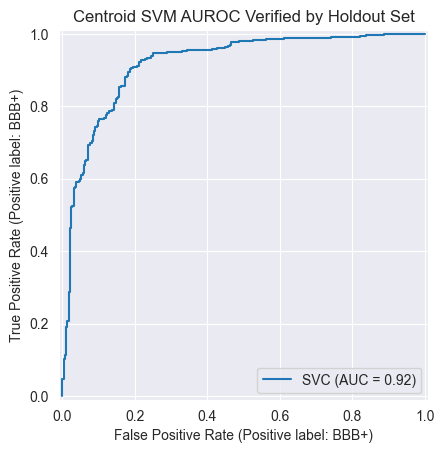

In [19]:
RocCurveDisplay.from_estimator(centroid_svm, centroid_X_processed, classification_holdout_y, pos_label='BBB+')
plt.title('Centroid SVM AUROC Verified by Holdout Set')

plt.savefig(
    r'model_outputs\svm_classifier\centroid_holdout_roc.png',
    dpi=600,
    bbox_inches='tight'
)
plt.show()

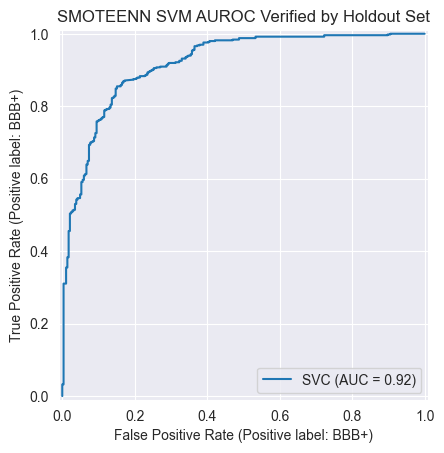

In [20]:
RocCurveDisplay.from_estimator(smoteenn_svm, smoteenn_X_processed, classification_holdout_y, pos_label='BBB+')
plt.title('SMOTEENN SVM AUROC Verified by Holdout Set')
plt.savefig(
    r'model_outputs\svm_classifier\smoteenn_holdout_roc.png',
    dpi=600,
    bbox_inches='tight'
)
plt.show()

## Delong's Test

In [21]:
centroid_probs = centroid_svm.predict_proba(centroid_X_processed)

smoteenn_probs = smoteenn_svm.predict_proba(smoteenn_X_processed)

centroid_auc = roc_auc_score(classification_holdout_y, centroid_probs[:, 1])

smoteenn_auc = roc_auc_score(classification_holdout_y, smoteenn_probs[:, 1])


In [22]:
new_centroid_probs = centroid_probs[:,1]
new_smoteenn_probs = smoteenn_probs[:,1]

In [23]:
holdout_y = classification_holdout_y.values
np.delete(holdout_y, 1)

for i in range(len(holdout_y)):
    if holdout_y[i] == 'BBB+':
        holdout_y[i] = 1
    else:
        holdout_y[i] = 0


In [24]:
p_val = delongs_test(new_centroid_probs, new_smoteenn_probs, centroid_auc, smoteenn_auc, holdout_y)

Model A's V10: [0.28771929824561404, 0.02456140350877193, 0.007017543859649123, 0.07719298245614035, 0.017543859649122806, 0.031578947368421054, 0.11929824561403508, 0.0, 0.017543859649122806, 0.22807017543859648, 0.021052631578947368, 0.010526315789473684, 0.07017543859649122, 0.0912280701754386, 0.0912280701754386, 0.17192982456140352, 0.021052631578947368, 0.010526315789473684, 0.017543859649122806, 0.021052631578947368, 0.15789473684210525, 0.021052631578947368, 0.08421052631578947, 0.08070175438596491, 0.021052631578947368, 0.017543859649122806, 0.021052631578947368, 0.017543859649122806, 0.7403508771929824, 0.0035087719298245615, 0.010526315789473684, 0.02456140350877193, 0.021052631578947368, 0.02456140350877193, 0.10175438596491228, 0.0035087719298245615, 0.021052631578947368, 0.021052631578947368, 0.0035087719298245615, 0.06315789473684211, 0.017543859649122806, 0.021052631578947368, 0.0, 0.010526315789473684, 0.0035087719298245615, 0.017543859649122806, 0.4666666666666667, 0.